<a href="https://colab.research.google.com/github/Sumith-Pevekar/Titanic_Survival_Machine_Learning/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('/content/drive/MyDrive/TitanicDataset/titanic_train.csv')


In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Data Visualization**

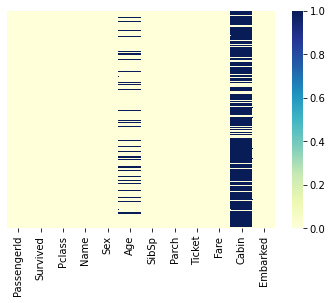

In [4]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=True, cmap='YlGnBu')


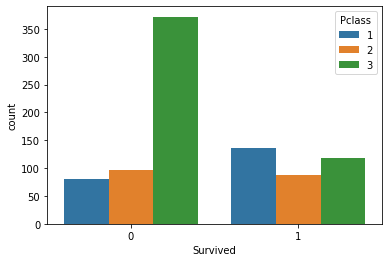

In [5]:
sns.countplot(x='Survived',hue='Pclass',data=train)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


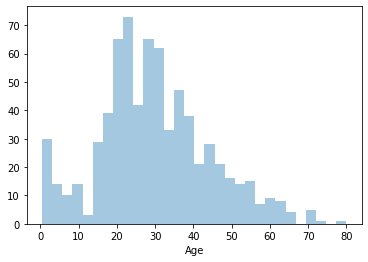

In [6]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)


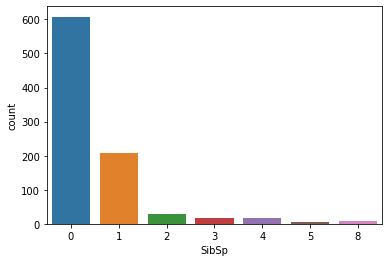

In [7]:
sns.countplot(x='SibSp', data=train)


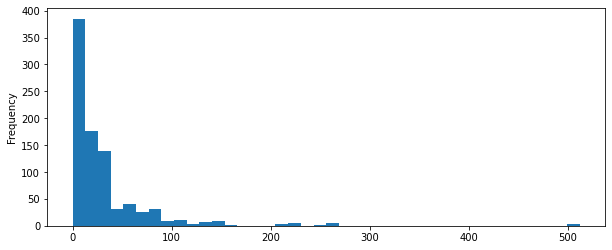

In [8]:
train['Fare'].plot.hist(bins=40, figsize=(10,4))


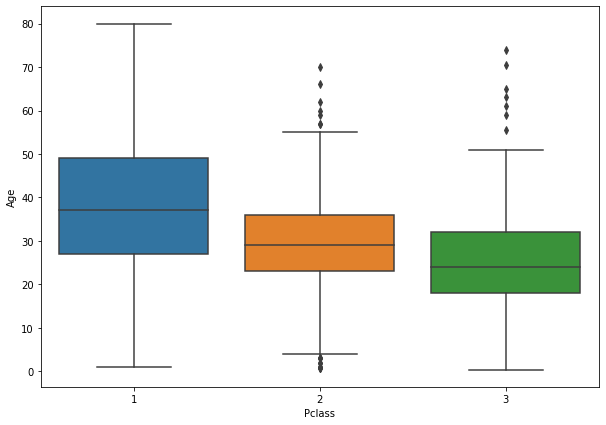

In [9]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

**Data Cleaning**

In [10]:
def age_populate(cols):
  Age=cols[0]
  Pclass=cols[1]
  if pd.isnull(Age):
    if Pclass==1:
      return 37
    elif Pclass==2:
      return 29
    else:
      return 24
  else:
    return Age 

In [11]:
train['Age']=train[['Age','Pclass']].apply(age_populate,axis=1)

In [12]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


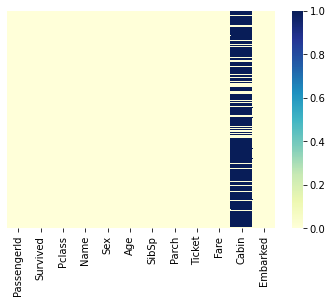

In [13]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=True, cmap='YlGnBu')


In [14]:
train.drop('Cabin', axis=1, inplace=True)


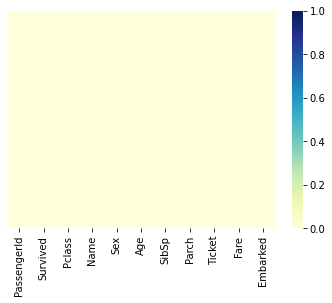

In [15]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=True, cmap='YlGnBu')


In [16]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
train.dropna(inplace=True)


In [18]:
sex=pd.get_dummies(train['Sex'], drop_first=True)
embark=pd.get_dummies(train['Embarked'], drop_first=True)
classes=pd.get_dummies(train['Pclass'])

In [19]:
train=pd.concat([train,sex,embark], axis=1)
train=pd.concat([train,classes], axis=1)

In [20]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
train.drop('PassengerId', axis=1, inplace=True)
train.drop('Pclass', axis=1, inplace=True)

In [21]:
train

,Survived,Age,SibSp,Parch,Fare,male,Q,S,1,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,0,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,0,1,0,1,0
887,1,19.0,0,0,30.0000,0,0,1,1,0,0
888,0,24.0,1,2,23.4500,0,0,1,0,0,1
889,1,26.0,0,0,30.0000,1,0,0,1,0,0


In [22]:
test=pd.read_csv('/content/drive/MyDrive/TitanicDataset/titanic_test.csv')


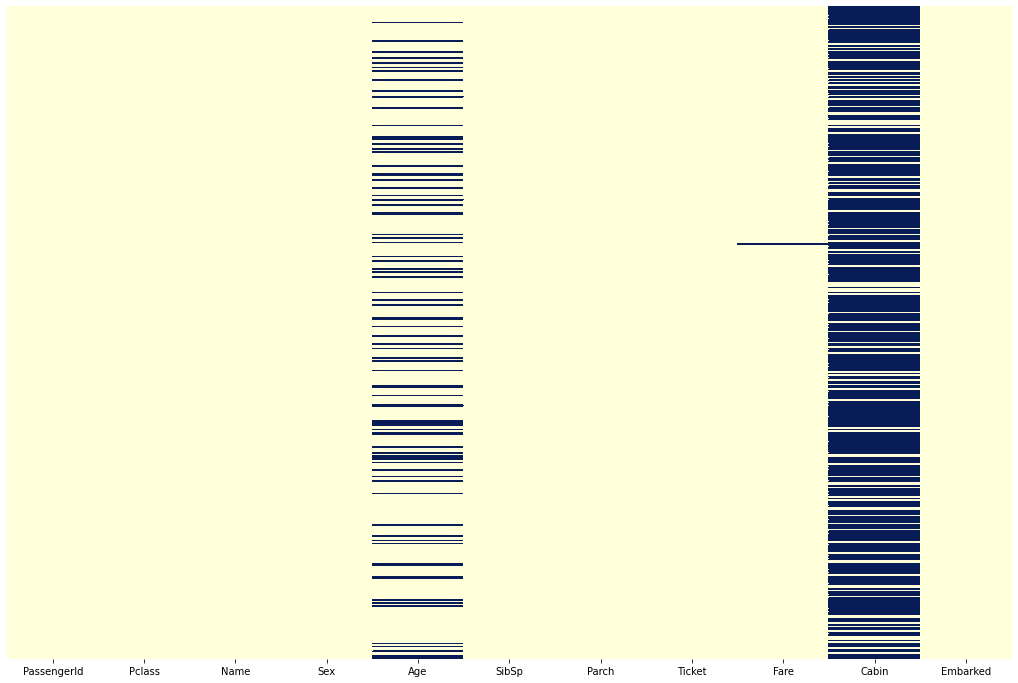

In [23]:
plt.figure(figsize=(18,12))
sns.heatmap(test.isnull(),yticklabels=False, cbar=False, cmap='YlGnBu')

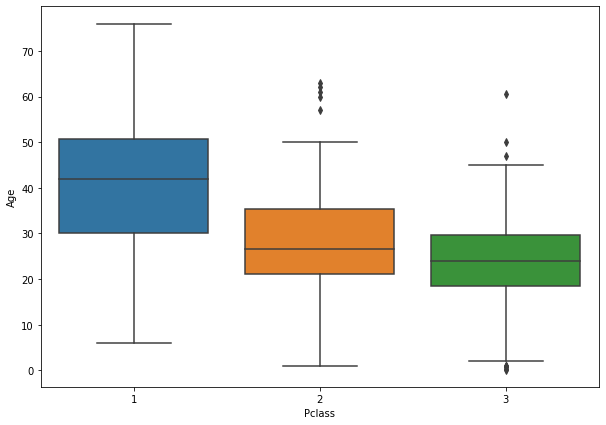

In [24]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=test)

In [25]:
def age_populate2(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 42
        elif Pclass==2:
            return 26
        else:
            return 24
    else:
        return Age

In [26]:
test['Age']=test[['Age', 'Pclass']].apply(age_populate2, axis=1)


In [27]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,NaN,S


In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.NaN, strategy = 'mean')
imputer = imputer.fit(test.iloc[:, 8:9])
test.iloc[:, 8:9] = imputer.transform(test.iloc[:, 8:9])


In [35]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,NaN,S


In [36]:
test.drop('Cabin', axis=1, inplace=True)


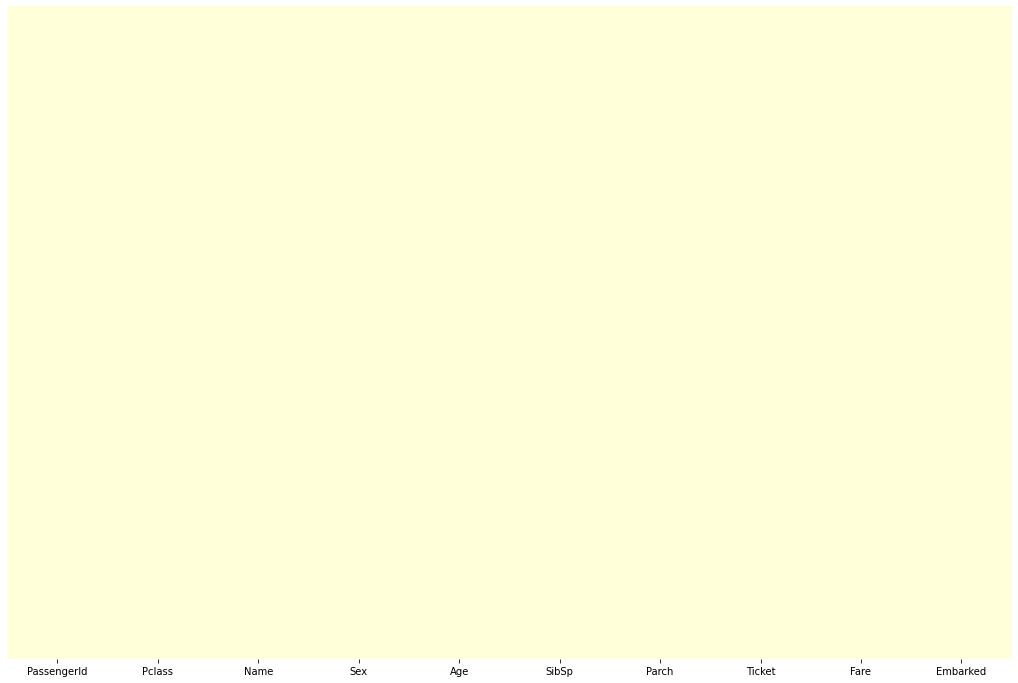

In [37]:
plt.figure(figsize=(18,12))
sns.heatmap(test.isnull(),yticklabels=False, cbar=False, cmap='YlGnBu')

In [38]:
sex2=pd.get_dummies(test['Sex'], drop_first=True)
embark2=pd.get_dummies(test['Embarked'], drop_first=True)
test=pd.concat([test,sex2,embark2], axis=1)
pclasses=pd.get_dummies(test['Pclass'])
test=pd.concat([test,pclasses], axis=1)

In [39]:
result=test.iloc[:,0]


In [40]:
test.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
test.drop('PassengerId', axis=1, inplace=True)
test.drop('Pclass', axis=1, inplace=True)

In [41]:
x_train=train.iloc[:,1:]
y_train=train.iloc[:,0:1]
x_test=test.iloc[:,:]

In [42]:
from sklearn.linear_model import LogisticRegression
logisticReg=LogisticRegression()
logisticReg.fit(x_train,y_train)

y_pred= logisticReg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGIST

In [43]:
accuracy = round(logisticReg.score(x_train, y_train) * 100, 2)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [44]:
print(accuracy)


80.88


In [45]:
df=pd.DataFrame(dict(PassengerId = result, Survived = y_pred)).reset_index()
df.drop('index', axis=1, inplace=True)

df.to_csv('logresult.csv', index=False)

In [46]:
from sklearn.ensemble import RandomForestClassifier
ranFor = RandomForestClassifier(n_estimators = 70)

In [47]:
ranFor.fit(x_train,y_train)
y_pred2= ranFor.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [48]:
accuracy2 =round(ranFor.score(x_train, y_train)*100,2)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [49]:
print(accuracy2)


98.2


In [50]:
df=pd.DataFrame(dict(PassengerId = result, Survived = y_pred2)).reset_index()
df.drop('index', axis=1, inplace=True)

df.to_csv('rfcresult.csv', index=False)

In [51]:
from sklearn.svm import SVC
svc=SVC()

In [52]:
svc.fit(x_train, y_train)

y_pred3=svc.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [53]:
accuracy3=round(svc.score(x_train, y_train)*100,2)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [54]:
print(accuracy3)


68.05


In [55]:
df=pd.DataFrame(dict(PassengerId = result, Survived = y_pred2)).reset_index()
df.drop('index', axis=1, inplace=True)

df.to_csv('svcresult.csv', index=False)